In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [3]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [4]:
seed_19_sex = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.554534,0.056201,0.445466,-0.056201
1,Cardiomegaly,0.574420,-0.002361,0.425580,0.002361
2,Lung Opacity,0.574429,0.051069,0.425571,-0.051069
3,Lung Lesion,0.468454,0.122541,0.531546,-0.122541
4,Edema,0.554559,-0.020867,0.445441,0.020867


In [5]:
seed_19_age = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.428384,0.007842,0.302234,0.000000,0.093298,0.008145,0.173456,-0.054809,0.002628,-0.160870
1,Cardiomegaly,0.475794,0.065608,0.242513,0.000000,0.063049,-0.007886,0.215042,0.111299,0.003603,-0.038243
2,Lung Opacity,0.447798,0.000000,0.263662,-0.012426,0.078100,-0.008062,0.208809,0.027191,0.001631,0.029144
3,Lung Lesion,0.533123,0.037616,0.239748,0.038512,0.066246,-0.037616,0.160883,-0.048821,0.000000,NaN
4,Edema,0.467696,0.039680,0.250897,0.000000,0.045585,-0.169184,0.235104,0.042104,0.000718,-0.149499


In [6]:
seed_19_race = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.713535,0.035998,0.126150,-0.077665,0.070959,0.110993,0.042050,-0.035998,0.028909,-0.129748,0.018397,0.370252
1,Cardiomegaly,0.669219,0.007547,0.167755,0.047072,0.070029,-0.007547,0.049989,0.026968,0.036028,-0.056703,0.006980,-0.095816
2,Lung Opacity,0.702488,0.040223,0.157423,-0.010951,0.051387,-0.030896,0.052814,0.090190,0.026917,-0.026927,0.008972,0.010951


In [7]:
seed_19_insurance = pd.read_csv("./TPR_GAPS/Run_seed19_TPR_GAP_insurance.csv",index_col=0)
seed_31_insurance = pd.read_csv("./TPR_GAPS/Run_seed31_TPR_GAP_insurance.csv",index_col=0)
seed_38_insurance = pd.read_csv("./TPR_GAPS/Run_seed38_TPR_GAP_insurance.csv",index_col=0)
seed_47_insurance = pd.read_csv("./TPR_GAPS/Run_seed47_TPR_GAP_insurance.csv",index_col=0)
seed_77_insurance = pd.read_csv("./TPR_GAPS/Run_seed77_TPR_GAP_insurance.csv",index_col=0)
seed_77_insurance.head(3)

,diseases,%Medicare,Gap_Medicare,%Other,Gap_Other,%Medicaid,Gap_Medicaid
0,Enlarged Cardiomediastinum,0.441524,-0.021526,0.479632,0.000000,0.078844,0.002283
1,Cardiomegaly,0.529836,0.026206,0.407341,0.000000,0.062824,-0.041852
2,Lung Opacity,0.505098,0.000000,0.413744,-0.007565,0.081158,0.014027


In [8]:
diseases = ['Lung Opacity', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']

diseases_abbr = {'Cardiomegaly': 'Cardiomegaly',
                'Effusion': 'Effusion',
                'Enlarged Cardiomediastinum': 'Enlarged Card.',
                'Lung Lesion': 'Lung Lesion',
                'Atelectasis': 'Atelectasis',
                'Pneumonia': 'Pneumonia',
                'Pneumothorax': 'Pneumothorax',
                'Consolidation': 'Consolidation',
                'Edema': 'Edema',
                'Pleural Effusion': 'Effusion',
                'Pleural Other': 'Pleural Other',
                'Fracture': 'Fracture',
                'Support Devices': 'Sup. Devices',
                'Lung Opacity': 'Air. Opacity',
                }


## 1. Gender

In [9]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [10]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [11]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [12]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [13]:
for disease in diseases:
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [14]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
8,Pleural Effusion,Effusion,0.008940,0.575157,0.004470,0.007851,0.424843,-0.004470,0.007851
10,Pneumonia,Pneumonia,0.010337,0.617912,0.005169,0.013719,0.382088,-0.005169,0.013719
2,Cardiomegaly,Cardiomegaly,0.017074,0.574420,-0.008537,0.005094,0.425580,0.008537,0.005094
6,Fracture,Fracture,0.032385,0.570406,0.016192,0.013455,0.429594,-0.016192,0.013455
4,Edema,Edema,0.042947,0.554559,-0.021473,0.012066,0.445441,0.021473,0.012066
11,Pneumothorax,Pneumothorax,0.047458,0.621339,0.023729,0.013419,0.378661,-0.023729,0.013419
12,Support Devices,Sup. Devices,0.048080,0.596462,0.024040,0.002366,0.403538,-0.024040,0.002366
0,Lung Opacity,Air. Opacity,0.065445,0.574429,0.032722,0.013633,0.425571,-0.032722,0.013633
1,Atelectasis,Atelectasis,0.081751,0.596863,0.040875,0.016035,0.403137,-0.040875,0.016035
5,Enlarged Cardiomediastinum,Enlarged Card.,0.085051,0.554534,0.042525,0.027912,0.445466,-0.042525,0.027912


In [15]:
sex_tpr_disp_df.to_csv("./TPR_GAPS/sex_tpr_disp.csv")

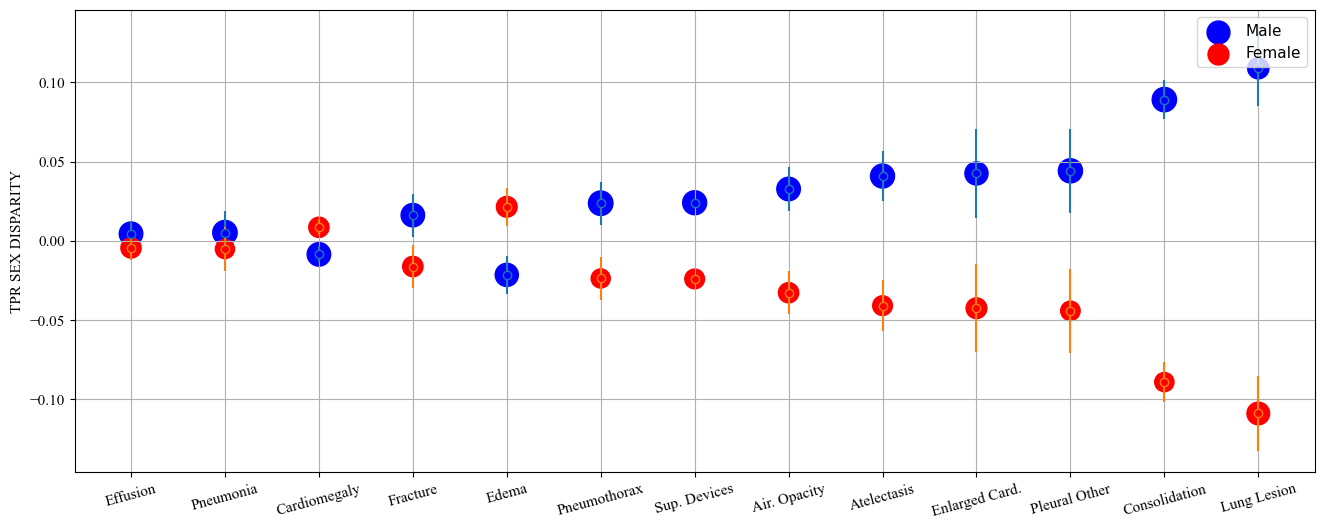

In [16]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_SEX.pdf")


## 2. Age

In [17]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [18]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [19]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [20]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [21]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [23]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [24]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [25]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [26]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [27]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./TPR_GAPS/age_tpr_disp.csv")

In [28]:
plt.rcParams.update({'font.size': font_size})

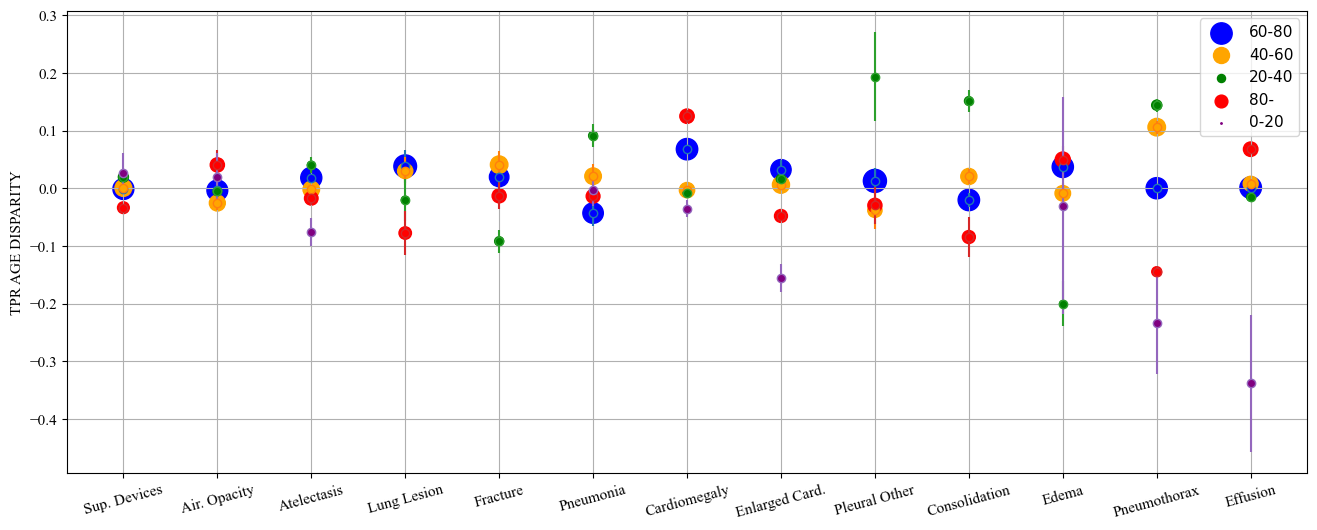

In [29]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_AGE.pdf")

## 3. Race

In [30]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [31]:
result_race_grouped_stat

%White                                     \
                            count      mean  std       min       25%   
diseases                                                               
Atelectasis                   5.0  0.720124  0.0  0.720124  0.720124   
Cardiomegaly                  5.0  0.669219  0.0  0.669219  0.669219   
Consolidation                 5.0  0.693069  0.0  0.693069  0.693069   
Edema                         5.0  0.705312  0.0  0.705312  0.705312   
Enlarged Cardiomediastinum    5.0  0.713535  0.0  0.713535  0.713535   
Fracture                      5.0  0.780430  0.0  0.780430  0.780430   
Lung Lesion                   5.0  0.711356  0.0  0.711356  0.711356   
Lung Opacity                  5.0  0.702488  0.0  0.702488  0.702488   
No Finding                    5.0  0.620452  0.0  0.620452  0.620452   
Pleural Effusion              5.0  0.729915  0.0  0.729915  0.729915   
Pleural Other                 5.0  0.639423  0.0  0.639423  0.639423   
Pneumonia                     5.0  0.706186  0.0  0.706186  0.706186   
Pneumothorax                  5.0  0.754184  0.0  0.754184  0.754184   
Support Devices               5.0  0.698821  0.0  0.698821  0.698821   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.720124  0.720124  0.720124       5.0  0.004045   
Cardiomegaly                0.669219  0.669219  0.669219       5.0  0.009488   
Consolidation               0.693069  0.693069  0.693069       5.0  0.039671   
Edema                       0.705312  0.705312  0.705312       5.0  0.043083   
Enlarged Cardiomediastinum  0.713535  0.713535  0.713535       5.0  0.032263   
Fracture                    0.780430  0.780430  0.780430       5.0  0.110132   
Lung Lesion                 0.711356  0.711356  0.711356       5.0 -0.014249   
Lung Opacity                0.702488  0.702488  0.702488       5.0  0.033948   
No Finding                  0.620452  0.620452  0.620452       5.0 -0.031301   
Pleural Effusion            0.729915  0.729915  0.729915       5.0  0.011477   
Pleural Other               0.639423  0.639423  0.639423       5.0  0.046711   
Pneumonia                   0.706186  0.706186  0.706186       5.0 -0.006243   
Pneumothorax                0.754184  0.754184  0.754184       5.0  0.015578   
Support Devices             0.698821  0.698821  0.698821       5.0 -0.005382   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.011266  0.011266          5.0  0.170438   
Cardiomegaly                ...  0.006980  0.006980          5.0 -0.076775   
Consolidation               ...  0.008911  0.008911          5.0 -0.199853   
Edema                       ...  0.009691  0.009691          5.0 -0.138132   
Enlarged Cardiomediastinum  ...  0.018397  0.018397          5.0  0.377856   
Fracture                    ...  0.002387  0.002387          5.0 -0.192009   
Lung Lesion                 ...  0.000000  0.000000          0.0       NaN   
Lung Opacity                ...  0.008972  0.008972          5.0  0.006001   
No Finding                  ...  0.008069  0.008069          5.0 -0.310698   
Pleural Effusion            ...  0.012218  0.012218          5.0 -0.065686   
Pleural Other               ...  0.000000  0.000000          0.0       NaN   
Pneumonia                   ...  0.004510  0.004510          5.0 -0.173787   
Pneumothorax                ...  0.001046  0.001046          5.0  0.541792   
Support Devices             ...  0.016934  0.016934          5.0  0.073167   

                                                                              \
                                 s

In [32]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [33]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [34]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [35]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [36]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [37]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [38]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [39]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [40]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [41]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./TPR_GAPS/race_tpr_disp.csv")

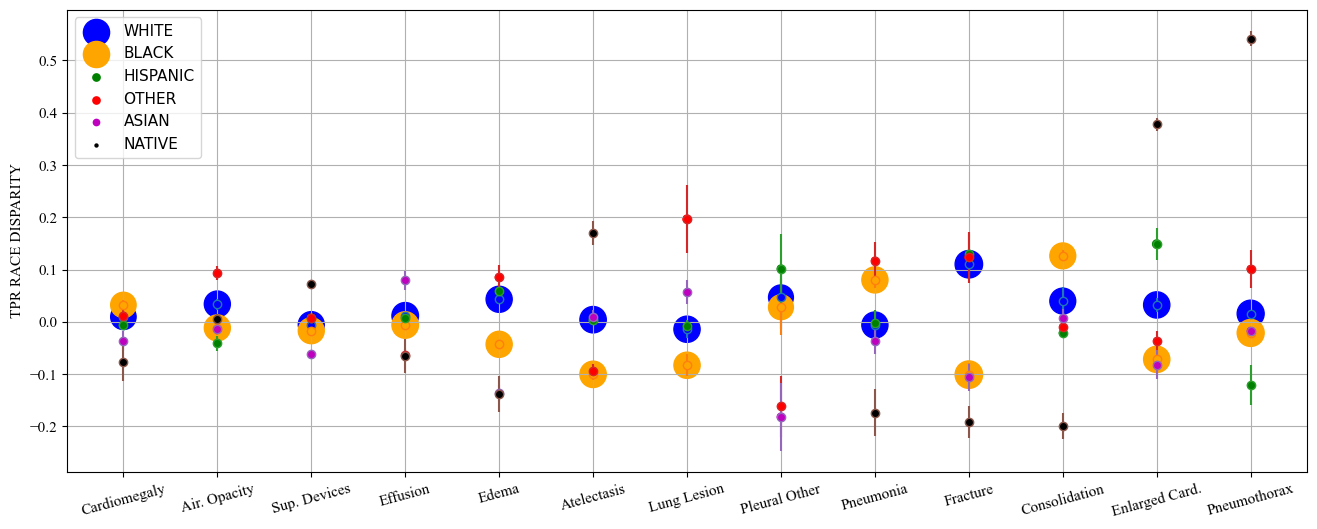

In [42]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_RACE.pdf")

## 4.  Insurance

In [43]:
insurance_dataframes = [seed_19_insurance, seed_31_insurance, seed_38_insurance,
                        seed_47_insurance,seed_77_insurance]
result_insurance_df= pd.concat(insurance_dataframes)

result_insurance_grouped =result_insurance_df.groupby("diseases")
result_insurance_grouped_stat = result_insurance_grouped.describe()

In [44]:
result_insurance_grouped_stat

%Medicare                                    \
                               count      mean           std       min   
diseases                                                                 
Atelectasis                      5.0  0.502982  0.000000e+00  0.502982   
Cardiomegaly                     5.0  0.529836  0.000000e+00  0.529836   
Consolidation                    5.0  0.490099  0.000000e+00  0.490099   
Edema                            5.0  0.571070  0.000000e+00  0.571070   
Enlarged Cardiomediastinum       5.0  0.441524  0.000000e+00  0.441524   
Fracture                         5.0  0.417661  6.206335e-17  0.417661   
Lung Lesion                      5.0  0.383281  0.000000e+00  0.383281   
Lung Opacity                     5.0  0.505098  0.000000e+00  0.505098   
No Finding                       5.0  0.377788  0.000000e+00  0.377788   
Pleural Effusion                 5.0  0.496668  0.000000e+00  0.496668   
Pleural Other                    5.0  0.504808  0.000000e+00  0.504808   
Pneumonia                        5.0  0.501933  0.000000e+00  0.501933   
Pneumothorax                     5.0  0.347280  0.000000e+00  0.347280   
Support Devices                  5.0  0.460538  0.000000e+00  0.460538   

                                                                    \
                                 25%       50%       75%       max   
diseases                                                             
Atelectasis                 0.502982  0.502982  0.502982  0.502982   
Cardiomegaly                0.529836  0.529836  0.529836  0.529836   
Consolidation               0.490099  0.490099  0.490099  0.490099   
Edema                       0.571070  0.571070  0.571070  0.571070   
Enlarged Cardiomediastinum  0.441524  0.441524  0.441524  0.441524   
Fracture                    0.417661  0.417661  0.417661  0.417661   
Lung Lesion                 0.383281  0.383281  0.383281  0.383281   
Lung Opacity                0.505098  0.505098  0.505098  0.505098   
No Finding                  0.377788  0.377788  0.377788  0.377788   
Pleural Effusion            0.496668  0.496668  0.496668  0.496668   
Pleural Other               0.504808  0.504808  0.504808  0.504808   
Pneumonia                   0.501933  0.501933  0.501933  0.501933   
Pneumothorax                0.347280  0.347280  0.347280  0.347280   
Support Devices             0.460538  0.460538  0.460538  0.460538   

                           Gap_Medicare            ... %Medicaid            \
                                  count      mean  ...       75%       max   
diseases                                           ...                       
Atelectasis                         5.0 -0.031079  ...  0.071571  0.071571   
Cardiomegaly                        5.0  0.037424  ...  0.062824  0.062824   
Consolidation                       5.0  0.000000  ...  0.091089  0.091089   
Edema                               5.0  0.042157  ...  0.066045  0.066045   
Enlarged Cardiomediastinum          5.0 -0.012655  ...  0.078844  0.078844   
Fracture                            5.0 -0.016893  ...  0.076372  0.076372   
Lung Lesion                         5.0 -0.057111  ...  0.064669  0.064669   
Lung Opacity                        5.0  0.000000  ...  0.081158  0.081158   
No Finding                          5.0 -0.130304  ...  0.099765  0.099765   
Pleural Effusion                    5.0 -0.002402  ...  0.070529  0.070529   
Pleural Other                       5.0 -0.065287  ...  0.076923  0.076923   
Pneumonia                           5.0 -0.003921  ...  0.070876  0.070876   
Pneumothorax                        5.0 -0.151962  ...  0.050209  0.050209   
Support Devices                     5.0  0.002166  ...  0.083459  0.083459   

                           Gap_Medicaid                                \
                                  count      mean       std       min   
diseases                                                                
Atelectasis                    

In [45]:
insurance_tpr_disp = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [46]:
insurance_df_medicare_mean = result_insurance_grouped_stat['%Medicare']['mean']
insurance_df_medicare_gap = result_insurance_grouped_stat['Gap_Medicare']["mean"]
insurance_df_medicare_ci = significance_level * result_insurance_grouped_stat['Gap_Medicare']["std"] / np.sqrt(number_of_runs)


In [47]:
insurance_df_other_mean = result_insurance_grouped_stat['%Other']['mean']
insurance_df_other_gap = result_insurance_grouped_stat['Gap_Other']["mean"]
insurance_df_other_ci = significance_level * result_insurance_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [48]:
insurance_df_medicaid_mean = result_insurance_grouped_stat['%Medicaid']['mean']
insurance_df_medicaid_gap = result_insurance_grouped_stat['Gap_Medicaid']["mean"]
insurance_df_medicaid_ci = significance_level * result_insurance_grouped_stat['Gap_Medicaid']["std"] / np.sqrt(number_of_runs)


In [49]:
percent_medicaid_list = []
ci_medicaid_list = []
gap_medicaid_mean_list = []

percent_medicare_list = []
ci_medicare_list = []
gap_medicare_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []

In [50]:
for disease in diseases:
    mean_list = []

    percent_other_list.append(insurance_df_other_mean[disease])
    gap_other_mean_list.append(insurance_df_other_gap[disease])
    ci_other_list.append(insurance_df_other_ci[disease])
    mean_list.append(insurance_df_other_ci[disease])

    percent_medicare_list.append(insurance_df_medicare_mean[disease])
    gap_medicare_mean_list.append(insurance_df_medicare_gap[disease])
    ci_medicare_list.append(insurance_df_medicare_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])

    percent_medicaid_list.append(insurance_df_medicaid_mean[disease])
    gap_medicaid_mean_list.append(insurance_df_medicaid_gap[disease])
    ci_medicaid_list.append(insurance_df_medicaid_ci[disease])
    mean_list.append(insurance_df_medicare_ci[disease])


    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [51]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%Medicare": percent_medicare_list, 'Gap_C_mean': gap_medicare_mean_list, 'CI_C': ci_medicare_list,
     "%Other": percent_other_list, 'Gap_O_mean': gap_other_mean_list, 'CI_O': ci_other_list,
     "%Medicaid": percent_medicaid_list, 'Gap_A_mean': gap_medicaid_mean_list, 'CI_A': ci_medicaid_list
     }

In [52]:
insurance_tpr_disp_df = pd.DataFrame(d)
insurance_tpr_disp_df = insurance_tpr_disp_df.sort_values(by ='Distance' )
insurance_tpr_disp_df.to_csv("./TPR_GAPS/insurance_tpr_disp.csv")


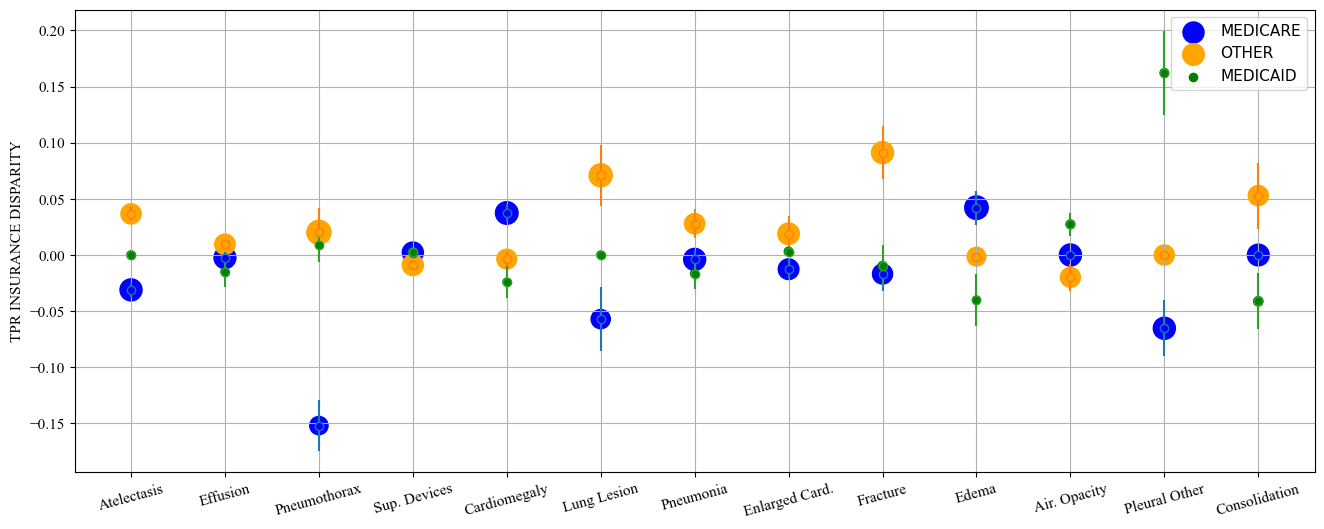

In [53]:
plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Medicare'],500), marker='o',color='blue', label="MEDICARE")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_C_mean'],
             yerr = insurance_tpr_disp_df['CI_C'],fmt='o',mfc='blue')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Other'],500), marker='o',color='orange', label="OTHER")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_O_mean'],
             yerr = insurance_tpr_disp_df['CI_O'],fmt='o',mfc='orange')

plt.scatter(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
            s= np.multiply(insurance_tpr_disp_df['%Medicaid'],500), marker='o',color='green', label="MEDICAID")
plt.errorbar(insurance_tpr_disp_df['diseases_abbr'],insurance_tpr_disp_df['Gap_A_mean'],
             yerr = insurance_tpr_disp_df['CI_A'],fmt='o',mfc='green')


plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR INSURANCE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./TPR_GAPS/TPR_Dis_INSURANCE.pdf")